In [3]:
#Así se importa la paquetería. * significa que importa todo
from math import * 
from numpy import *   #sirve para hacer arreglos
from scipy import *
from pylab import *
%matplotlib inline
from scipy.integrate import*

\begin{eqnarray*}
\frac{d^2 y}{dt^2}+\sin y &=& 0  \\
\frac{dy}{dt} &=& v \\
\frac{dv}{dt}=\frac{d^2 y}{dt^2}&=&-\sin y \\
\end{eqnarray*}

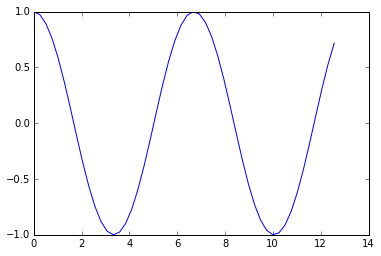

In [4]:
def pendulo(y,t):
    return array([y[1],-(sin(y[0]))])

tiempo=linspace(0, 4*pi)
y=odeint(pendulo,[1.,0.],tiempo)

plot(tiempo, y[:,0])


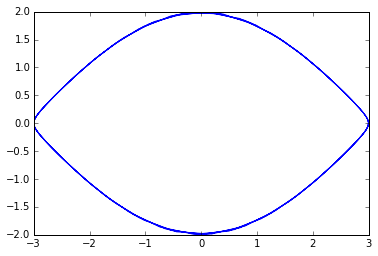

In [7]:
tiempo=linspace(0, 20*pi,200)
y=odeint(pendulo,[3.,0.],tiempo)

plot(y[:,0], y[:,1])

""" Jugando con los puntos iniciales del péndulo  veo que en y0=(x,y) me conviene agarrarlo con x=0 y y≤2 """

In [16]:
#Vamos crear una funcnión que cree condiciones iniciales

def cond_ini(n):
    vec_ini=[]
    for i in xrange(n):                 #range(n) hace arreglos de 0 a n-1 y xrange nel 
        vec_ini.append([0.,2*rand()])
    return vec_ini

cond_ini(4)

[[0.0, 0.4197284657528908],
 [0.0, 1.9782817396495294],
 [0.0, 1.0242353772930943],
 [0.0, 0.8577066975019758]]

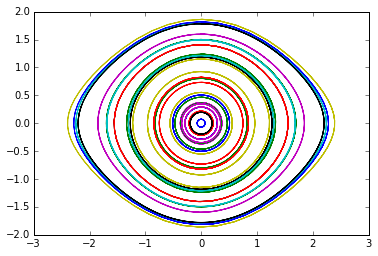

In [17]:
puntos_iniciales=cond_ini(30)
y_t=[]
v_t=[]
tiempo=linspace(0,8*pi,150)
for y0_v0 in puntos_iniciales:
    sols= odeint(pendulo,y0_v0,tiempo)
    y_t.append(sols[:,0])
    v_t.append(sols[:,1])
    plot (sols[:,0],sols[:,1])

$y''+2\gamma y'+\omega_0^2 \sin y=0$

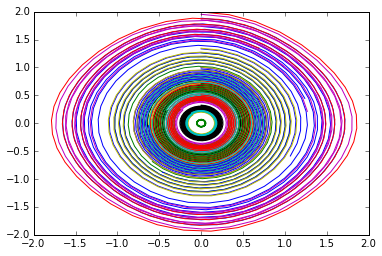

In [28]:
#Para ponerle friccion
def pendulo_friccion(y,t,param=[0.01,1.5]):                  #gamma=0.1 hace que sea el valor default
    return array([y[1],-( 2*param[0]*y[1] + param[1]*sin(y[0]))]) #gamma es el amortiguamiento

puntos_iniciales=cond_ini(30)
y_t=[]
v_t=[]
tiempo=linspace(0,8*pi,150)

for y0_v0 in puntos_iniciales:
    sols= odeint(pendulo_friccion,y0_v0,tiempo)
    y_t.append(sols[:,0])
    v_t.append(sols[:,1])
    plot (sols[:,0],sols[:,1])


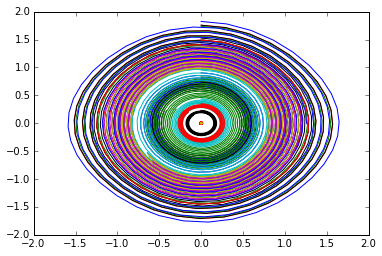

In [30]:
puntos_iniciales=cond_ini(30)
y_t=[]
v_t=[]
tiempo=linspace(0,8*pi,150)

for y0_v0 in puntos_iniciales:
    sols= odeint(pendulo_friccion,y0_v0,tiempo,args=([.01,1.5],))   #Lo vuelve a escribir 
    y_t.append(sols[:,0])
    v_t.append(sols[:,1])
    plot (sols[:,0],sols[:,1])

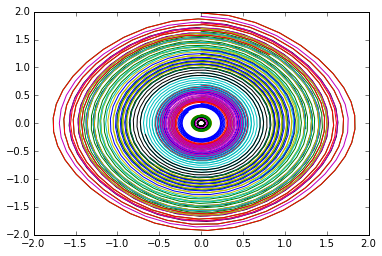

In [31]:
#Aquí lo mismo pero notaciín para humanos
def pendulo_friccion(y,t,gamma=0.01,omega2=1.5):                  #gamma=0.1 hace que sea el valor default
    return array([y[1],-( 2*gamma*y[1] + omega2*sin(y[0]))]) #gamma es el amortiguamiento

puntos_iniciales=cond_ini(30)
y_t=[]
v_t=[]
tiempo=linspace(0,8*pi,150)

for y0_v0 in puntos_iniciales:
    sols= odeint(pendulo_friccion,y0_v0,tiempo,args=(.01,1.5))   #Lo vuelve a escribir 
    y_t.append(sols[:,0])
    v_t.append(sols[:,1])
    plot (sols[:,0],sols[:,1])
